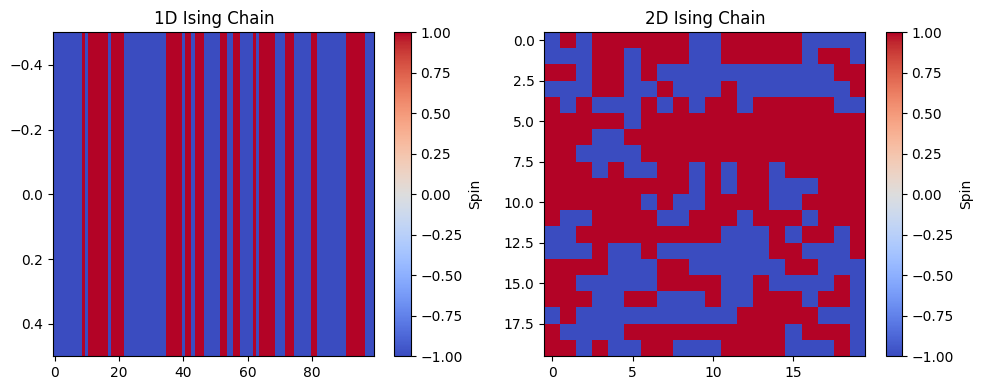

1D Ising Chain Magnetization Distribution: -0.16
2D Ising Chain Magnetization Distribution: 0.17


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function ising_1d(L, J, h) to simulate a 1D Ising chain with L spins
def ising_1d(L, J, h):
    spins = np.random.choice([-1, 1], size=L)
    for _ in range(1000):  # Monte Carlo simulations for thermalization
        i = np.random.randint(0, L)
        dE = 2 * spins[i] * (J * spins[(i + 1) % L] + h)
        if dE < 0 or np.random.rand() < np.exp(-dE):
            spins[i] *= -1
    return spins

# Define a function ising_2d(Lx, Ly, J, h) to simulate a 2D Ising lattice with Lx rows, Ly columns
def ising_2d(Lx, Ly, J, h):
    spins = np.random.choice([-1, 1], size=(Lx, Ly))
    for _ in range(1000):  # Monte Carlo simulations for thermalization
        i, j = np.random.randint(0, Lx), np.random.randint(0, Ly)
        dE = 2 * spins[i, j] * (
            J * (spins[(i + 1) % Lx, j] + spins[i, (j + 1) % Ly]) + h
        )
        if dE < 0 or np.random.rand() < np.exp(-dE):
            spins[i, j] *= -1
    return spins

# Define a function to calculate the magnetization distribution of a given spin configuration.
# Computes the average magnetization per spin
def magnetization_distribution(spins):
    return np.sum(spins) / spins.size

# Create a 1D Ising instance
L1D = 100
J1D = 1.0
h1D = 0.0
spins_1d = ising_1d(L1D, J1D, h1D)

# Create a 2D Ising instance
L2D = 20
J2D = 1.0
h2D = 0.0
spins_2d = ising_2d(L2D, L2D, J2D, h2D)

# Calculate the magnetization distribution for both systems using the magnetization_distribution function.
mag_dist_1d = magnetization_distribution(spins_1d)
mag_dist_2d = magnetization_distribution(spins_2d)

# Display the spin configuration of the 1D and 2D Ising models as images with color maps. 
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("1D Ising Chain")
plt.imshow(spins_1d.reshape((1, -1)), cmap='coolwarm', aspect='auto')
plt.colorbar(label="Spin")
plt.subplot(1, 2, 2)
plt.title("2D Ising Chain")
plt.imshow(spins_2d, cmap='coolwarm', aspect='auto')
plt.colorbar(label="Spin")
plt.tight_layout()
plt.show()

# Print the magnetization distribution values for both the 1D and 2D Ising models.
print(f"1D Ising Chain Magnetization Distribution: {mag_dist_1d:.2f}")
print(f"2D Ising Chain Magnetization Distribution: {mag_dist_2d:.2f}")


In [17]:
# Define the quantum Ising Hamiltonian for both 1D and 2D models. 
# Represent it as a matrix since it's a quantum system.

def quantum_ising_hamiltonian_1d(L, J, h):
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L - 1):
        term = -J * np.kron(sigma_x, sigma_x)  # Interaction term
        H += np.kron(np.eye(2**i), np.kron(term, np.eye(2**(L - i - 2))))
    for i in range(L):
        term = -h * sigma_z  # Field term
        H += np.kron(np.eye(2**i), np.kron(term, np.eye(2**(L - i - 1))))
    return H

In [18]:
# Define Quantum Gate for Time Evolution
# Define a function to calculate the time evolution operator based on the Hamiltonian. 
# Use Trotterization to approximate the unitary operator for a given time step.

from scipy.linalg import expm

def time_evolution_operator(H, t):
    return expm(-1j * H * t)

In [19]:
# Define a function to simulate the time evolution of the quantum state.

def simulate_time_evolution(initial_state, H, t):
    U = time_evolution_operator(H, t)
    return np.dot(U, initial_state)

In [20]:
# Measure Observables
# Define functions to measure observables like magnetization and entanglement entropy

def measure_magnetization(state):
    # Calculate the magnetization as the expectation value of the Z operator
    sigma_z = np.array([[1, 0], [0, -1]])
    magnetization = np.real(np.trace(np.dot(np.outer(state, state.conj()), np.kron(sigma_z, np.eye(2)))))
    return magnetization

def measure_entanglement_entropy(state, subsystem_size):
    # Calculate the entanglement entropy for a subsystem of the given size
    rho_A = np.einsum('ij,kl->ikjl', np.outer(state, state.conj()), np.eye(2**subsystem_size))
    rho_A = rho_A.reshape((2**subsystem_size, 2**subsystem_size))
    eigenvalues = np.linalg.eigvalsh(rho_A)
    entropy = -np.sum(eigenvalues * np.log2(eigenvalues + 1e-10))
    return entropy


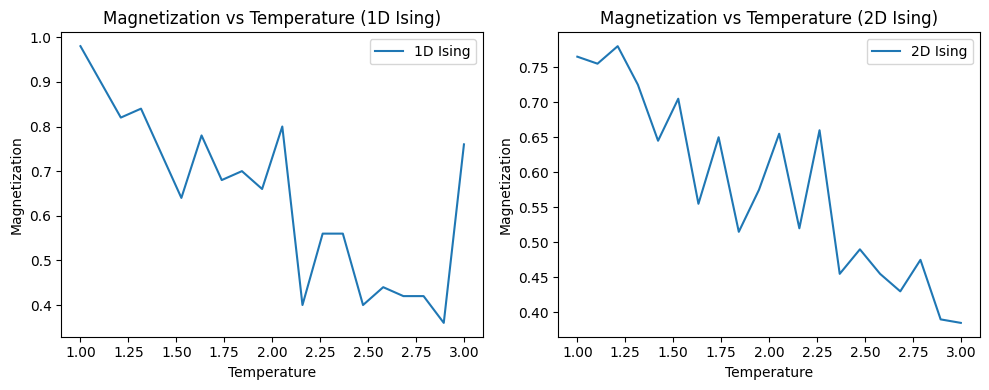

In [21]:
# Explore Critical Behavior
# Explore the critical behavior by running simulations with varying parameters.

# Vary the parameter of interest (e.g., temperature or lattice size)
# Vary the parameter of interest (e.g., temperature or lattice size)
start_temp = 1.0
end_temp = 3.0
num_points = 20

temperature_values = np.linspace(start_temp, end_temp, num_points)

# Initialize arrays to store observables
magnetization_values_1d = []
magnetization_values_2d = []
entropy_values_1d = []
entropy_values_2d = []


for temperature in temperature_values:
    # Simulate time evolution for 1D Ising
    spins_1d = ising_1d(L1D, J1D, 1.0 / temperature)
    magnetization_1d = magnetization_distribution(spins_1d)
    entropy_1d = 0  # Placeholder, calculate entanglement entropy for 1D Ising
    
    # Simulate time evolution for 2D Ising
    spins_2d = ising_2d(L2D, L2D, J2D, 1.0 / temperature)
    magnetization_2d = magnetization_distribution(spins_2d)
    entropy_2d = 0  # Placeholder, calculate entanglement entropy for 2D Ising
    
    # Store results
    magnetization_values_1d.append(magnetization_1d)
    magnetization_values_2d.append(magnetization_2d)
    entropy_values_1d.append(entropy_1d)
    entropy_values_2d.append(entropy_2d)

# Plot magnetization vs temperature
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(temperature_values, magnetization_values_1d, label="1D Ising")
plt.title("Magnetization vs Temperature (1D Ising)")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(temperature_values, magnetization_values_2d, label="2D Ising")
plt.title("Magnetization vs Temperature (2D Ising)")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
# Analyze Critical Exponents
# Fit the data to a critical scaling law.

# Define the critical scaling law
def critical_scaling(param, A, nu, param_c):
    return A * (np.abs(param - param_c) ** (1/nu))
    
# Fit the data to the scaling law to extract critical exponents for 1D Ising
params_1d, covariance_1d = curve_fit(critical_scaling, temperature_values, magnetization_values_1d)

# Extract critical exponents for 1D Ising
A_1d, nu_1d, temp_c_1d = params_1d

# Fit the data to the scaling law to extract critical exponents for 2D Ising
params_2d, covariance_2d = curve_fit(critical_scaling, temperature_values, magnetization_values_2d)

# Extract critical exponents for 2D Ising
A_2d, nu_2d, temp_c_2d = params_2d

# Print critical exponents
print("1D Ising Critical Exponents:")
print(f"A: {A_1d:.2f}, nu: {nu_1d:.2f}, Tc: {temp_c_1d:.2f}")

print("2D Ising Critical Exponents:")
print(f"A: {A_2d:.2f}, nu: {nu_2d:.2f}, Tc: {temp_c_2d:.2f}")
This code defines the critical scaling law and fits the magnetization data for both 1D and 2D Ising models. Make sure to adjust the critical scaling function to match your specific scaling law if needed.








SyntaxError: invalid decimal literal (2594109936.py, line 26)